<a href="https://colab.research.google.com/github/HauwaUmar/DATA-6100/blob/main/DATA_6100_Project_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd

In [2]:
train_dataset = pd.read_csv("train.csv")
test_dataset = pd.read_csv("test.csv")

In [3]:
train_dataset.shape

(8693, 14)

In [4]:
# this function will go through the data frame and return information on columns with missing values such as the number of missing data in
# each column and the percentage of missing value overall for each column
def info_on_missing_values(df):
    total_missing_values = df.isnull().sum().sort_values(ascending = False)[df.isnull().sum().sort_values(ascending = False) != 0]
    percentage = round(df.isnull().sum().sort_values(ascending = False)/len(df)*100,2)[round(df.isnull().sum().sort_values(ascending = False)/len(df)*100,2) != 0]
    data_type = df.dtypes.sort_values(ascending = False)[df.isnull().sum().sort_values(ascending = False) != 0]
    decription_of_missing_values = pd.concat([total_missing_values, percentage, data_type], axis=1, keys=['Total Missing Val','Percentage','Data Type'])
    return decription_of_missing_values

info_on_missing_values(train_dataset)

,Total Missing Val,Percentage,Data Type
CryoSleep,217,2.50,object
ShoppingMall,208,2.39,float64
VIP,203,2.34,object
HomePlanet,201,2.31,object
Name,200,2.30,object
Cabin,199,2.29,object
VRDeck,188,2.16,float64
FoodCourt,183,2.11,float64
Spa,183,2.11,float64
Destination,182,2.09,object


In [5]:
info_on_missing_values(test_dataset)

,Total Missing Val,Percentage,Data Type
FoodCourt,106,2.48,float64
Spa,101,2.36,float64
Cabin,100,2.34,object
ShoppingMall,98,2.29,float64
Name,94,2.20,object
CryoSleep,93,2.17,object
VIP,93,2.17,object
Destination,92,2.15,object
Age,91,2.13,float64
HomePlanet,87,2.03,object


In [6]:
# combine both testing and training dataset for transformation
whole_dataset = pd.concat((train_dataset, test_dataset)).reset_index(drop = True)

In [7]:
info_on_missing_values(whole_dataset)

,Total Missing Val,Percentage,Data Type
Transported,4277,32.98,object
CryoSleep,310,2.39,object
ShoppingMall,306,2.36,float64
Cabin,299,2.31,object
VIP,296,2.28,object
Name,294,2.27,object
FoodCourt,289,2.23,float64
HomePlanet,288,2.22,object
Spa,284,2.19,float64
Destination,274,2.11,object


In [8]:
dummy_var = ['HomePlanet','Destination']
nominal_var = ['CryoSleep','VIP']


In [9]:
whole_dataset['Cabin']= whole_dataset['Cabin'].apply(lambda x: str(x).split('/')[-1])

In [10]:
whole_dataset

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0001_01,Europa,False,P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False
1,0002_01,Earth,False,S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True
2,0003_01,Europa,False,S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False
3,0003_02,Europa,False,S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False
4,0004_01,Earth,False,S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12965,9266_02,Earth,True,S,TRAPPIST-1e,34.0,False,0.0,0.0,0.0,0.0,0.0,Jeron Peter,NaN
12966,9269_01,Earth,False,nan,TRAPPIST-1e,42.0,False,0.0,847.0,17.0,10.0,144.0,Matty Scheron,NaN
12967,9271_01,Mars,True,P,55 Cancri e,NaN,False,0.0,0.0,0.0,0.0,0.0,Jayrin Pore,NaN
12968,9273_01,Europa,False,P,NaN,NaN,False,0.0,2680.0,0.0,0.0,523.0,Kitakan Conale,NaN


In [11]:
# label encoding (changing the value in cryo sleep from true to 1 and false to 0)
whole_dataset= whole_dataset.replace({"CryoSleep":{'False':0,'True':1}})

# label encoding (changing the value in cryo sleep from true to 1 and false to 0)
whole_dataset= whole_dataset.replace({"Cabin":{'P':0,'S':1}})

# label encoding (changing the value in cryo sleep from true to 1 and false to 0)
whole_dataset= whole_dataset.replace({"VIP":{'False':0,'True':1}})

In [12]:
whole_dataset

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0001_01,Europa,False,0,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False
1,0002_01,Earth,False,1,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True
2,0003_01,Europa,False,1,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False
3,0003_02,Europa,False,1,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False
4,0004_01,Earth,False,1,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12965,9266_02,Earth,True,1,TRAPPIST-1e,34.0,False,0.0,0.0,0.0,0.0,0.0,Jeron Peter,NaN
12966,9269_01,Earth,False,nan,TRAPPIST-1e,42.0,False,0.0,847.0,17.0,10.0,144.0,Matty Scheron,NaN
12967,9271_01,Mars,True,0,55 Cancri e,NaN,False,0.0,0.0,0.0,0.0,0.0,Jayrin Pore,NaN
12968,9273_01,Europa,False,0,NaN,NaN,False,0.0,2680.0,0.0,0.0,523.0,Kitakan Conale,NaN


In [13]:
whole_dataset.replace({"VIP":{'False':0,'True':1}},inplace=True)

In [14]:
#from sklearn import preprocessing
#le = preprocessing.LabelEncoder()
#ordinal_columns = ['CryoSleep','VIP']

#for col in ordinal_columns:
#    whole_dataset[col]=le.fit_transform(whole_dataset[col])

In [15]:
#le.classes_

In [16]:
#whole_dataset.loc[whole_dataset['HomePlanet'].isna(),whole_dataset['PassengerId'].apply(lambda x: str(x).split('_')[1])]
whole_dataset['group']= whole_dataset['PassengerId'].apply(lambda x: str(x).split('_')[0])
whole_dataset['group_no']= whole_dataset['PassengerId'].apply(lambda x: str(x).split('_')[1])

In [17]:
#pd.set_option('display.max_rows', f_group.first().shape[0]+1)

whole_dataset['HomePlanet'] = whole_dataset.groupby('group')['HomePlanet'].transform('first')


In [18]:
info_on_missing_values(whole_dataset)

,Total Missing Val,Percentage,Data Type
Transported,4277,32.98,object
CryoSleep,310,2.39,object
ShoppingMall,306,2.36,float64
VIP,296,2.28,object
Name,294,2.27,object
FoodCourt,289,2.23,float64
Spa,284,2.19,float64
Destination,274,2.11,object
Age,270,2.08,float64
VRDeck,268,2.07,float64


In [19]:
whole_dataset.shape

(12970, 16)

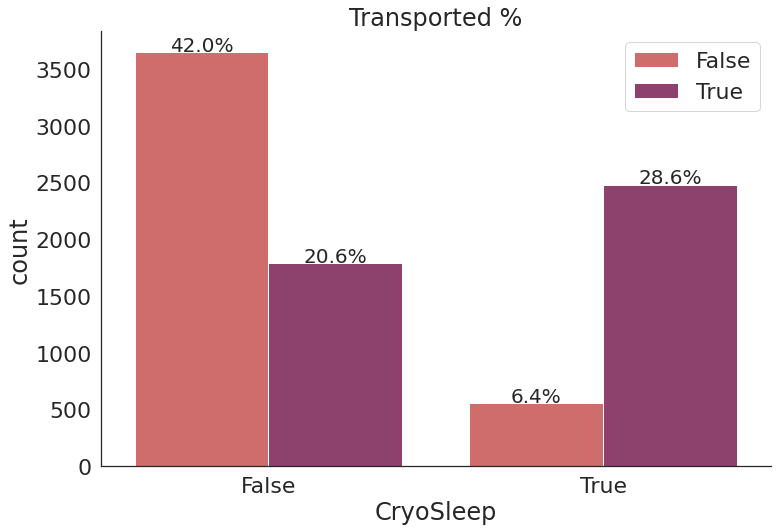

In [20]:
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.gridspec as grid_spec
from matplotlib.ticker import FuncFormatter
from matplotlib import rcParams

import seaborn as sns


total_cnt = whole_dataset['Transported'].count()
rcParams['figure.figsize'] = 12,8
sns.set(font_scale = 2)
sns.set_style("white")
ax = sns.countplot(x="CryoSleep",
                   hue="Transported", 
                   data=whole_dataset,
                   palette = 'flare')
ax.set_title('Transported %')
plt.legend(loc = 'upper right')
for p in ax.patches:
    x, height, width = p.get_x(), p.get_height(), p.get_width()
    ax.text(x + width / 2, height + 60, f'{height / total_cnt * 100:2.1f}%', va='center', ha='center', size=20)
sns.despine()

In [22]:
import plotly.express as px
#df = px.data.tips()
fig = px.histogram(whole_dataset, x="CryoSleep", 
             color='Transported', barmode='group',
             height=400)
fig.show()

KeyError: ignored